In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,Year,Price
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438


In [10]:
X = df['Year']
y = df['Price']

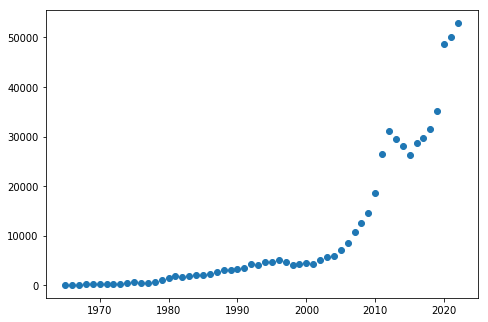

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y)

/home/student/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


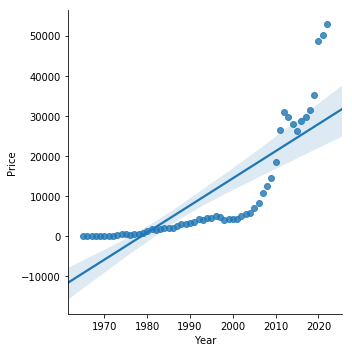

In [12]:
sns.lmplot(x = 'Year',y = 'Price', data = df)

In [13]:
df.describe()

,Year,Price
count,58.000000,58.000000
mean,1993.500000,10070.879310
std,16.886879,13921.378552
min,1965.000000,72.000000
25%,1979.250000,1035.250000
50%,1993.500000,4187.000000
75%,2007.750000,12075.000000
max,2022.000000,52950.000000


# Using GD

In [14]:
def initi():
    b = 1
    w = 1.9
    return b, w

In [15]:
def forward(X, b, w):
    z = b + (w * X)
    return z

In [16]:
def error(y,z):
    delta = z - y
    return delta

In [17]:
def update_param(b, w, z, learning_rate, delta, X):
    
    b = b - learning_rate * np.mean(delta)
    w = w - learning_rate * np.mean(delta * X)


    return b, w

In [18]:
def gradient_des(X, y, learning_rate, epochs):
    b, w = initi()
    
    for i in range(epochs):
        z = forward(X, b, w)
        delta = error(y, z)
        b, w = update_param(b, w, z, learning_rate, delta, X)
#         b = b - learning_rate * np.mean(delta)  # Update intercept
#         w = w - learning_rate * np.mean(delta * X)  # Update slope
        
        if i % 10 == 0:
            loss = np.sum(delta ** 2)
            loss = np.sqrt(loss)
            print(f"Epoch {i+1}/{epochs}, Loss: {loss}")
            
            
    return b, w


In [19]:
b,w = gradient_des(X, y, 0.1, 51)

Epoch 1/51, Loss: 115300.77475823829
Epoch 11/51, Loss: 4.77452017419623e+60
Epoch 21/51, Loss: 4.694085028450518e+116
Epoch 31/51, Loss: inf
Epoch 41/51, Loss: inf
Epoch 51/51, Loss: inf


In [47]:
print(w)
print(b)

1.1676994440819213e+286
5.857121161703943e+282


In [48]:
d = b + w * 2025

In [16]:
print("price of gold according to model: ", d)

price of gold according to model:  2.364591959978007e+289


In [33]:
print("error is : ", mean_squared_error(X,y))

error is :  255329125.68965518


# Using SKlearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pred = lr.predict(X.reshape(-1,1))

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
print("error is : ", mean_squared_error(X.reshape(-1,1),y))

error is :  255329125.68965518


# Simple


In [26]:
x_mean = df['Year'].mean()
y_mean = df['Price'].mean()


In [58]:
b1_numerator = 0
b1_denominator = 0
for i in range (len(df)):
    b1_numerator += (df['Year'][i] - x_mean)*(df['Price'][i]-y_mean) 
    b1_denominator += (df['Year'][i]-x_mean)*(df['Year'][i]-x_mean)


In [59]:
b1 = b1_numerator/b1_denominator
b0 = y_mean - b1*x_mean

In [60]:
print("b1 =",b1)
print("b0 =",b0)

b1 = 675.343658679135
b0 = -1336226.704266511


In [61]:
mse = 0
ans =0 
for i in range(len(df)):
    y_pred = b1*df['Year'][i] + b0
    ans += (y_pred - df['Price'][i])*(y_pred - df['Price'][i])
ans = ans/len(df)
rmse = ans**0.5
print("mse =",ans)
print("rmse =",rmse)

mse = 62644360.723755024
rmse = 7914.8190581816225


In [62]:
d = b + w * 2025

In [63]:
print("price of gold according to model: ", d)

price of gold according to model:  2.364591959978007e+289
